In [1]:
import pandas as pd
from scipy.linalg import svd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure, legend, plot, show, title, xlabel, ylabel

In [2]:
df = pd.read_csv('preprocessed_data.csv')

In [3]:
discrete_vars = df.select_dtypes(include=['object']).columns.tolist()

In [4]:
df_encoded = pd.get_dummies(df, columns=discrete_vars, drop_first=True).astype(int)

In [5]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1821 entries, 0 to 1820
Data columns (total 86 columns):
 #   Column                     Non-Null Count  Dtype
---  ------                     --------------  -----
 0   monthly_rent               1821 non-null   int64
 1   monthly_aconto             1821 non-null   int64
 2   size_sqm                   1821 non-null   int64
 3   rooms                      1821 non-null   int64
 4   floor                      1821 non-null   int64
 5   deposit                    1821 non-null   int64
 6   prepaid_rent               1821 non-null   int64
 7   total_monthly_rent         1821 non-null   int64
 8   housing_type_Værelse       1821 non-null   int64
 9   furnished_Nej              1821 non-null   int64
 10  roommate_friendly_Ja       1821 non-null   int64
 11  roommate_friendly_Nej      1821 non-null   int64
 12  pets_allowed_Ja            1821 non-null   int64
 13  pets_allowed_Nej           1821 non-null   int64
 14  elevator_Ja             

### PCA

In [6]:
X = df_encoded.to_numpy()
N = X.shape[0]

In [7]:
mean = np.mean(X, axis=0)
X_centered = X - mean

# Step 2: Compute covariance matrix
cov_matrix = np.cov(X_centered.T)

# Step 3: Compute eigenvalues and eigenvectors
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

# Step 4: Sort eigenvalues and eigenvectors
idx = np.argsort(eigenvalues)[::-1]
eigenvalues = eigenvalues[idx]
eigenvectors = eigenvectors[:, idx]

# Step 5: Project data onto principal components
X_pca = np.dot(X_centered, eigenvectors[:, :2])

# Results
print("Eigenvalues:", eigenvalues)
print("Eigenvectors:\n", eigenvectors)
print("Projected Data (PCA):\n", X_pca)

Eigenvalues: [ 1.58106331e+11  4.09309069e+09  2.88521420e+09  3.60259320e+05
  8.35469871e+02  5.60471688e+00  1.21469971e+00  5.87567142e-01
  4.33254446e-01  3.83279585e-01  3.52129601e-01  3.17858715e-01
  2.86077678e-01  2.70546751e-01  2.43418197e-01  2.24476793e-01
  2.13186339e-01  1.84266918e-01  1.52115428e-01  1.27657640e-01
  1.22591517e-01  1.17899913e-01  1.02120578e-01  9.37773602e-02
  9.10749511e-02  7.30362347e-02  6.56581929e-02  5.81799368e-02
  5.58077958e-02  4.99250909e-02  4.64239536e-02  4.37406580e-02
  4.13132986e-02  3.90356188e-02  3.86741159e-02  3.68116949e-02
  3.57004250e-02  3.45744418e-02  3.22923339e-02  2.99099395e-02
  2.83303271e-02  2.73250077e-02  2.56823149e-02  2.40567332e-02
  2.31359601e-02  2.26467076e-02  2.13410423e-02  2.04702340e-02
  2.01415614e-02  1.81080392e-02  1.66852777e-02  1.63955646e-02
  1.50448769e-02  1.34529303e-02  1.29366958e-02  1.18157354e-02
  1.06778489e-02  9.90926655e-03  9.30605487e-03  8.67681255e-03
  7.91822562

We need 3 components to explain at least 95% of the variance of the data


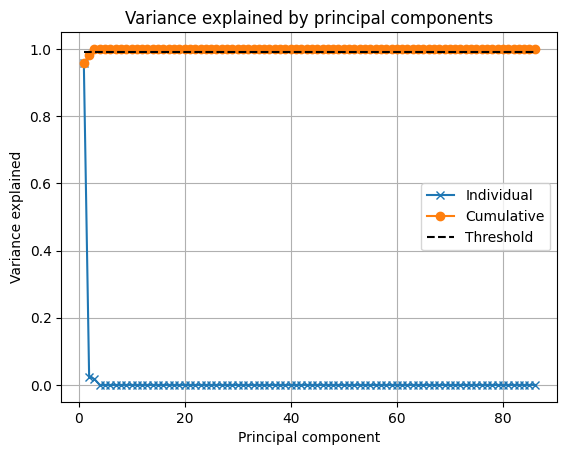

In [8]:
rho = eigenvalues / eigenvalues.sum()
threshold = 0.99

for i in range(len(eigenvalues)):
    if np.cumsum(rho)[i] > threshold:
        print(f'We need {i+1} components to explain at least 95% of the variance of the data')
        break

# Plot variance explained
plt.figure()
plt.plot(range(1, len(rho) + 1), rho, "x-")
plt.plot(range(1, len(rho) + 1), np.cumsum(rho), "o-")
plt.plot([1, len(rho)], [threshold, threshold], "k--")
plt.title("Variance explained by principal components")
plt.xlabel("Principal component")
plt.ylabel("Variance explained")
plt.legend(["Individual", "Cumulative", "Threshold"])
plt.grid()
plt.show()

### SVD

3 components/variables needed to surpass the threshold=0.99


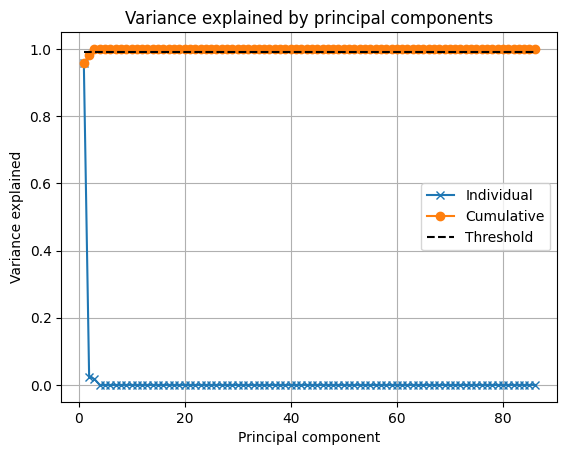

In [9]:
# Subtract mean value from data
Y = X - np.ones((N, 1)) * X.mean(axis=0)

# PCA by computing SVD of Y
U, S, V = svd(Y, full_matrices=False)

# Compute variance explained by principal components
rho = (S * S) / (S * S).sum()

threshold = 0.99

for i in range(len(rho)):
    if np.cumsum(rho)[i] > threshold:
        print(f'{i+1} components/variables needed to surpass the threshold={threshold}')
        break


# Plot variance explained
plt.figure()
plt.plot(range(1, len(rho) + 1), rho, "x-")
plt.plot(range(1, len(rho) + 1), np.cumsum(rho), "o-")
plt.plot([1, len(rho)], [threshold, threshold], "k--")
plt.title("Variance explained by principal components")
plt.xlabel("Principal component")
plt.ylabel("Variance explained")
plt.legend(["Individual", "Cumulative", "Threshold"])
plt.grid()
plt.show()

In [10]:
loadings_pc1 = V[0,:]
loadings_pc2 = V[1,:]

In [11]:
# Get the indices of the top 5 highest values
top_indices1 = np.argsort(loadings_pc1)[-5:]  # Get last 5 indices after sorting
top_indices_sorted1 = top_indices1[np.argsort(-loadings_pc1[top_indices1])]

top_indices2 = np.argsort(loadings_pc2)[-5:]  # Get last 5 indices after sorting
top_indices_sorted2 = top_indices2[np.argsort(-loadings_pc2[top_indices2])]

In [12]:
print('First Principal Component:\n')

for idx in top_indices_sorted1:
    print(f'{df_encoded.columns[idx]} with coefficient: {loadings_pc1[idx]}',end='\n')

print('\n#############################################################')
print('\nSecond Principal Component:\n')

for idx in top_indices_sorted2:
    print(f'{df_encoded.columns[idx]} with coefficient: {loadings_pc2[idx]}',end='\n')


First Principal Component:

deposit with coefficient: 0.8475301925681401
prepaid_rent with coefficient: 0.32296674468840747
total_monthly_rent with coefficient: 0.2978614608500762
monthly_rent with coefficient: 0.29776432810194614
monthly_aconto with coefficient: 9.713274813039074e-05

#############################################################

Second Principal Component:

prepaid_rent with coefficient: 0.717842837439366
deposit with coefficient: 0.07063921649484893
furnished_Nej with coefficient: 3.7341482925349314e-07
energy_mark_none with coefficient: 2.5451279383309437e-07
area_Brønshøj with coefficient: 2.5052520217622644e-07


In [13]:
df1 = pd.read_csv('preprocessed_data.csv')

In [14]:
classLabels = df1['energy_mark'].tolist()
classNames = set(classLabels)
classDict = dict(zip(classNames, range(len(classNames))))

# Extract vector y, convert to NumPy array
y = np.asarray([classDict[value] for value in classLabels])

Text(0, 0.5, 'PC2')

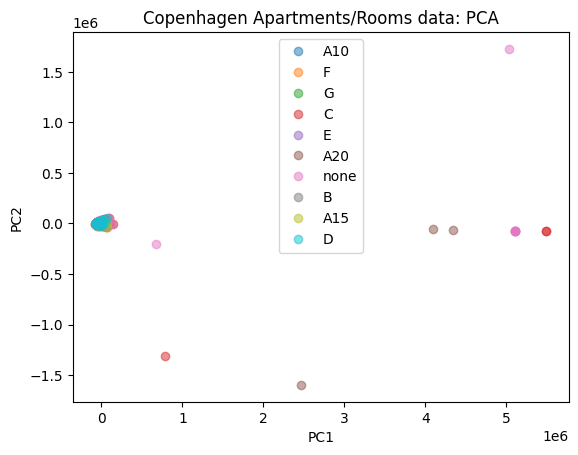

In [15]:
# Project the centered data onto principal component space
Z = Y @ V.T

# Indices of the principal components to be plotted
i = 0
j = 1

# Plot PCA of the data
f = figure()
title("Copenhagen Apartments/Rooms data: PCA")
# Z = array(Z)
for c in range(len(classNames)):
    # select indices belonging to class c:
    class_mask = y == c
    plot(Z[class_mask, i], Z[class_mask, j], "o", alpha=0.5)
legend(classNames)
xlabel("PC{0}".format(i + 1))
ylabel("PC{0}".format(j + 1))